In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.2MB/s 
     |████████████████████████████████| 501kB 17.5MB/s 
     |████████████████████████████████| 3.1MB 36.4MB/s 
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


In [0]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load and Prepare Fashion MNIST data.
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()


#checking datatypes
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

#coverting to float32 as random generated weight will be in float32
x_train, x_test = tf.cast(x_train, np.float32), tf.cast(x_test, np.float32)
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

# Normalize images value as max value is 255
x_train, x_test = x_train / 255, x_test / 255

#checking shape for all and unique labels in target
x_train.shape, y_train.shape, x_test.shape, y_test.shape, np.unique(y_train)

4423680/4422102 [==============================] - 0s 0us/step
uint8 uint8 uint8 uint8


(TensorShape([60000, 28, 28]),
 (60000,),
 TensorShape([10000, 28, 28]),
 (10000,),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Traing Set Sample Display:
 image no:22688   Label:7


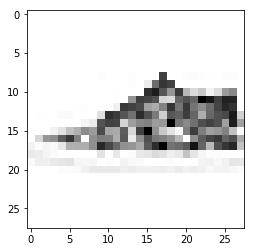

Test Set Sample Display:
 image no:3473   Label:3


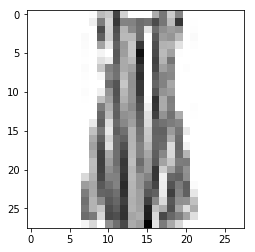

In [0]:
#display image from train set and test set
def display_image_label(featureset, labelset):
  img_no= np.random.randint(0, featureset.shape[0])
  img = featureset[img_no]
  label= labelset[img_no]
  print(f" image no:{img_no}   Label:{label}") # multiplying with 255 as we scaled with it
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()
  
print("Traing Set Sample Display:\n","="*50)
display_image_label(x_train, y_train)

print("Test Set Sample Display:\n","="*50)
display_image_label(x_test, y_test)

Parameters

In [0]:
# MNIST dataset parameters.
num_classes = 10 # (0-9 digits).
image_vector_size = 784 # (img shape: 28*28)

# Training parameters.
learning_rate = 0.001
training_steps = 5000
batch_size = 250
display_step = 200

# Network parameters.
n_hidden_1 = 256 # hidden layer1
n_hidden_2 = 456 # hidden layer2
n_hidden_3 = 556 # hidden layer3

In [0]:
# Flatten images  to feed as input
x_train=tf.reshape(x_train, [x_train.shape[0], image_vector_size])
x_test=tf.reshape(x_test, [x_test.shape[0], image_vector_size])

In [0]:
# Use batching of train data
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [0]:
# Create TF Model.
class NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
         # First fully-connected hidden layer.
        self.fc3 = layers.Dense(n_hidden_3, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
neural_net = NeuralNet()

In [0]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

In [0]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = neural_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

step: 200, loss: 1.5243408679962158, accuracy: 0.9399999976158142
step: 400, loss: 1.482727289199829, accuracy: 0.9800000190734863
step: 600, loss: 1.4937082529067993, accuracy: 0.9639999866485596
step: 800, loss: 1.5208423137664795, accuracy: 0.9440000057220459
step: 1000, loss: 1.4795299768447876, accuracy: 0.984000027179718
step: 1200, loss: 1.5123454332351685, accuracy: 0.9480000138282776
step: 1400, loss: 1.4928946495056152, accuracy: 0.972000002861023
step: 1600, loss: 1.4883073568344116, accuracy: 0.972000002861023
step: 1800, loss: 1.5202339887619019, accuracy: 0.9399999976158142
step: 2000, loss: 1.5022087097167969, accuracy: 0.9599999785423279
step: 2200, loss: 1.5057896375656128, accuracy: 0.9559999704360962
step: 2400, loss: 1.4987107515335083, accuracy: 0.9639999866485596
step: 2600, loss: 1.494396686553955, accuracy: 0.9679999947547913
step: 2800, loss: 1.505124807357788, accuracy: 0.9559999704360962
step: 3000, loss: 1.4850534200668335, accuracy: 0.9760000109672546
step:

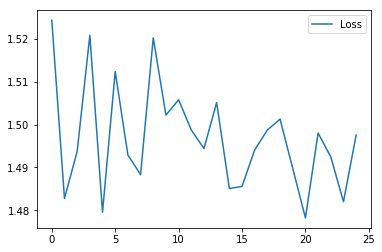

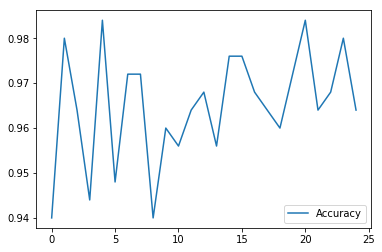

step: 200, loss: 1.5304229259490967, accuracy: 0.9319999814033508
step: 400, loss: 1.4779516458511353, accuracy: 0.984000027179718
step: 600, loss: 1.493610143661499, accuracy: 0.9679999947547913
step: 800, loss: 1.5150954723358154, accuracy: 0.9480000138282776
step: 1000, loss: 1.4801470041275024, accuracy: 0.984000027179718
step: 1200, loss: 1.5110617876052856, accuracy: 0.9520000219345093
step: 1400, loss: 1.4871262311935425, accuracy: 0.9760000109672546
step: 1600, loss: 1.4857226610183716, accuracy: 0.9760000109672546
step: 1800, loss: 1.5099680423736572, accuracy: 0.9520000219345093
step: 2000, loss: 1.4941132068634033, accuracy: 0.9679999947547913
step: 2200, loss: 1.4982327222824097, accuracy: 0.9639999866485596
step: 2400, loss: 1.5057860612869263, accuracy: 0.9559999704360962
step: 2600, loss: 1.496515154838562, accuracy: 0.9639999866485596
step: 2800, loss: 1.505906343460083, accuracy: 0.9559999704360962
step: 3000, loss: 1.4836784601211548, accuracy: 0.9760000109672546
step

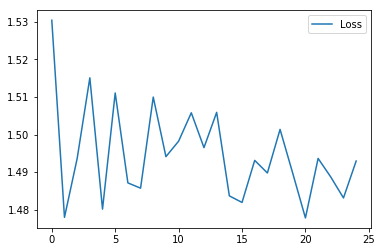

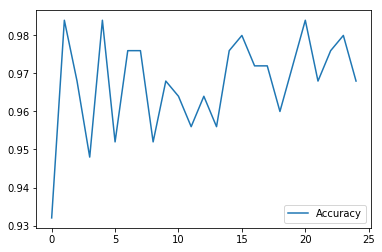

In [0]:
#collect loss and accuracy
loss_list, accuracy_list = [], []
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        loss_list.append(loss)
        acc = accuracy(pred, batch_y)
        accuracy_list.append(acc)
        print(f"step: {step}, loss: {loss}, accuracy: {acc}")
   
  
  
# plot loss and accuracy

def loss_plot(l1):
  plt.plot(l1, label="Loss")
  plt.legend()
  plt.show()

def acc_plot(l2):
  plt.plot(l2, label="Accuracy")
  plt.legend()
  plt.show()
  
#call plot  
loss_plot(loss_list)
acc_plot(accuracy_list)

In [0]:
# Test model on validation set.
pred = neural_net(x_test, is_training=False)
print(f"Test Accuracy:{accuracy(pred, y_test)}")
print(f"Loss:{cross_entropy_loss(pred, y_test)}")

Test Accuracy:0.8925999999046326
Loss:2.1877896785736084


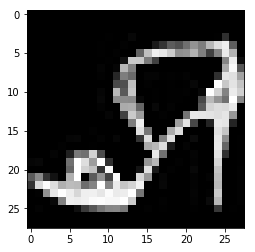

Image No. : 8040 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


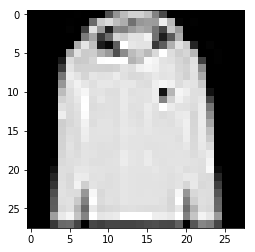

Image No. : 8041 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


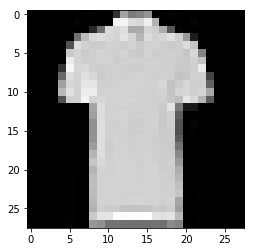

Image No. : 8042 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


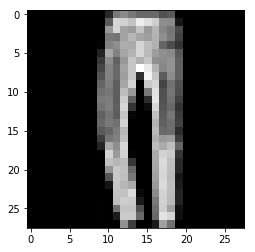

Image No. : 8043 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


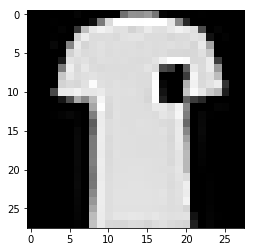

Image No. : 8044 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


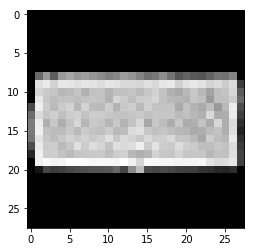

Image No. : 8045 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


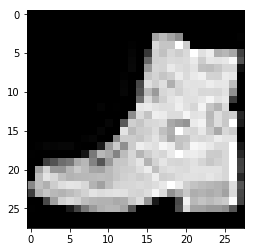

Image No. : 8046 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


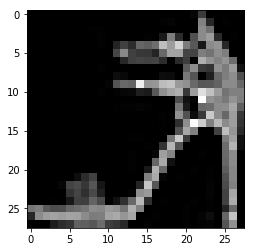

Image No. : 8047 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


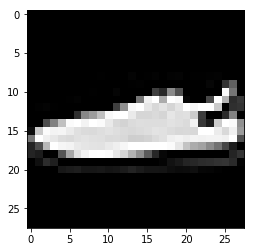

Image No. : 8048 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


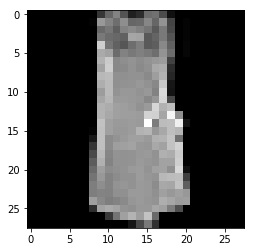

Image No. : 8049 , Predicted Label by Model :6, Actual Label: 3, Status: Opps! Wrong Prediction.


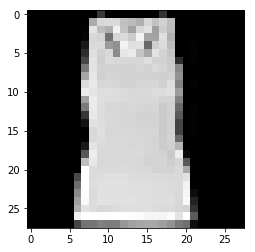

Image No. : 8050 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


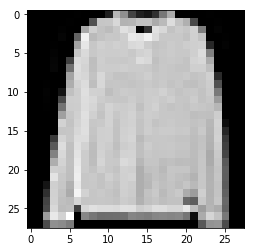

Image No. : 8051 , Predicted Label by Model :6, Actual Label: 2, Status: Opps! Wrong Prediction.


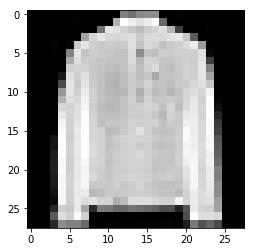

Image No. : 8052 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


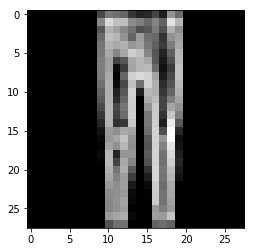

Image No. : 8053 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


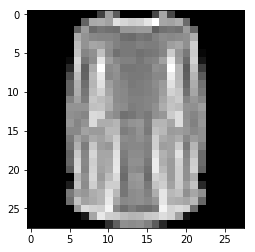

Image No. : 8054 , Predicted Label by Model :6, Actual Label: 3, Status: Opps! Wrong Prediction.


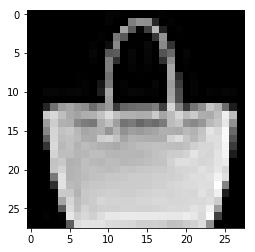

Image No. : 8055 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


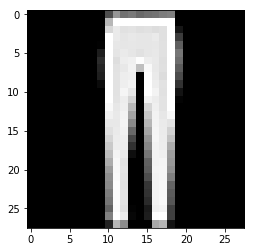

Image No. : 8056 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


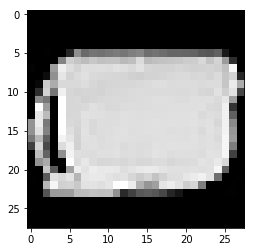

Image No. : 8057 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


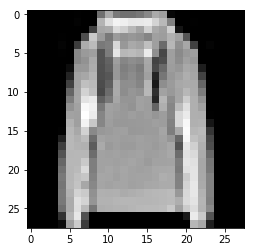

Image No. : 8058 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


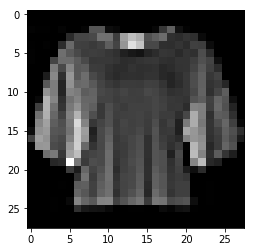

Image No. : 8059 , Predicted Label by Model :6, Actual Label: 0, Status: Opps! Wrong Prediction.


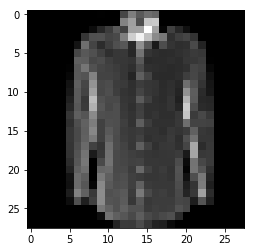

Image No. : 8060 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


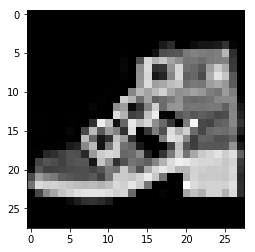

Image No. : 8061 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


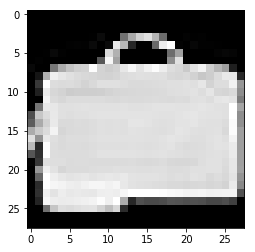

Image No. : 8062 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


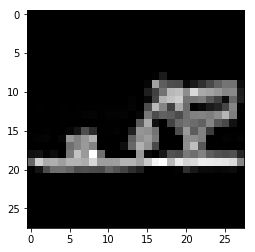

Image No. : 8063 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


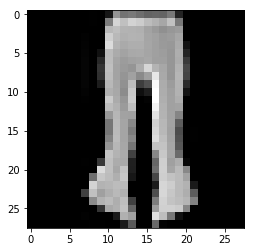

Image No. : 8064 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


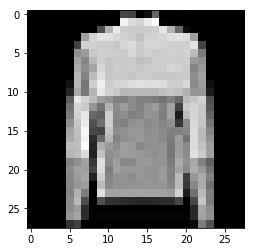

Image No. : 8065 , Predicted Label by Model :4, Actual Label: 2, Status: Opps! Wrong Prediction.


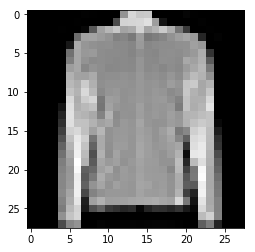

Image No. : 8066 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


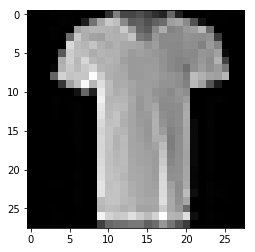

Image No. : 8067 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


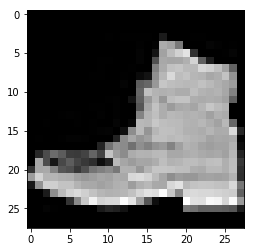

Image No. : 8068 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


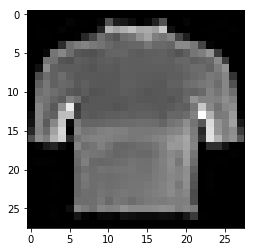

Image No. : 8069 , Predicted Label by Model :0, Actual Label: 6, Status: Opps! Wrong Prediction.


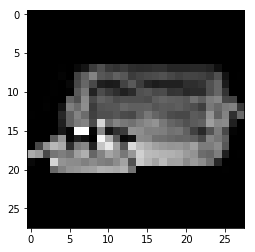

Image No. : 8070 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


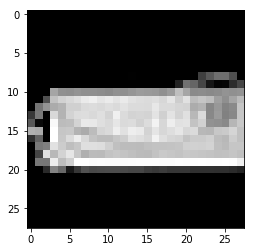

Image No. : 8071 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


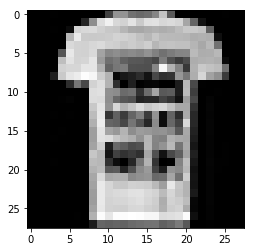

Image No. : 8072 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


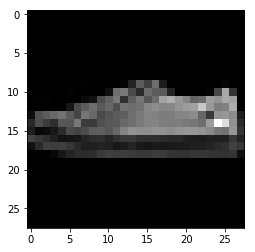

Image No. : 8073 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


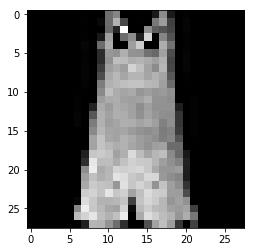

Image No. : 8074 , Predicted Label by Model :3, Actual Label: 1, Status: Opps! Wrong Prediction.


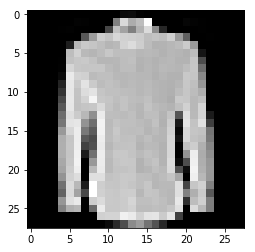

Image No. : 8075 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


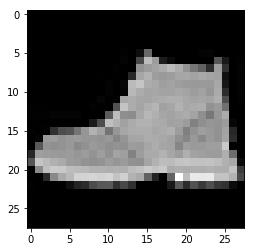

Image No. : 8076 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


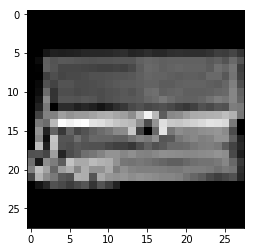

Image No. : 8077 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


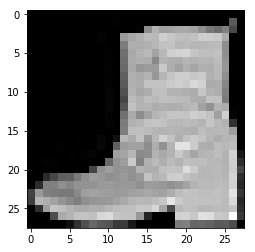

Image No. : 8078 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


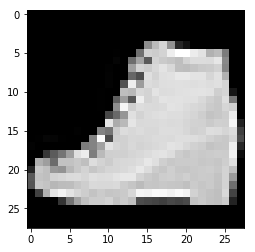

Image No. : 8079 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


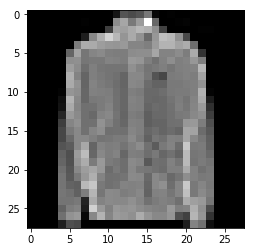

Image No. : 8080 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


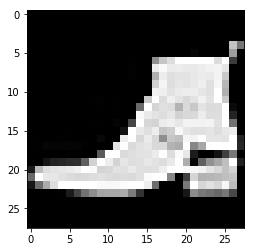

Image No. : 8081 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


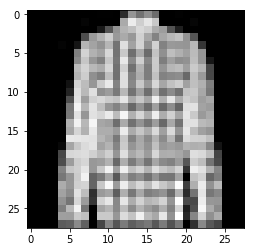

Image No. : 8082 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


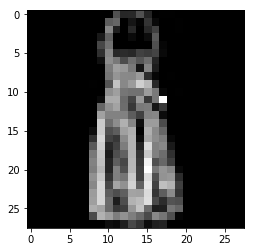

Image No. : 8083 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


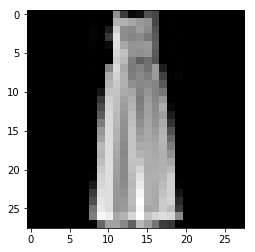

Image No. : 8084 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


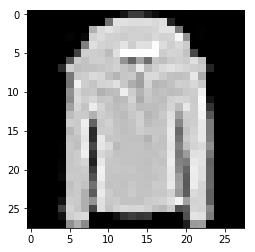

Image No. : 8085 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


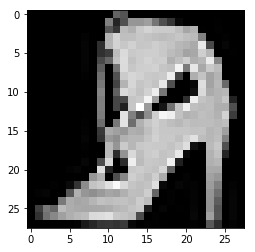

Image No. : 8086 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


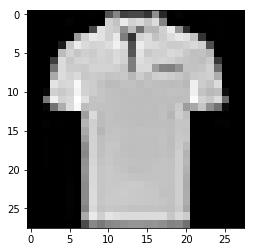

Image No. : 8087 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


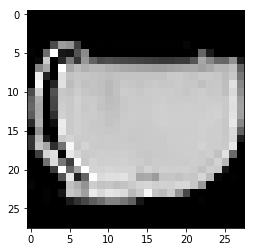

Image No. : 8088 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


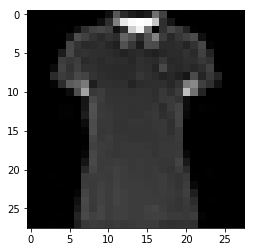

Image No. : 8089 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


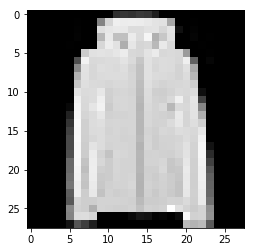

Image No. : 8090 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


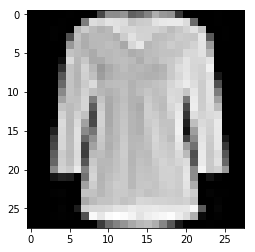

Image No. : 8091 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


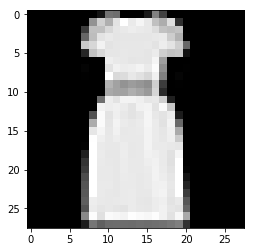

Image No. : 8092 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


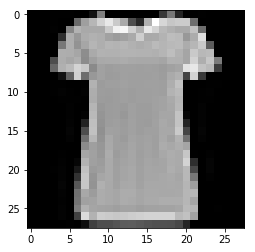

Image No. : 8093 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


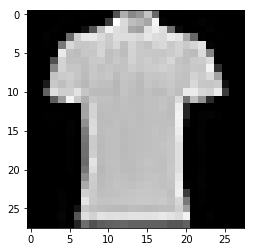

Image No. : 8094 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


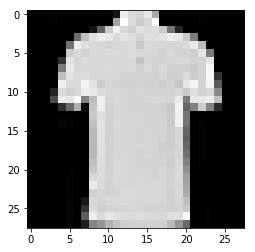

Image No. : 8095 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


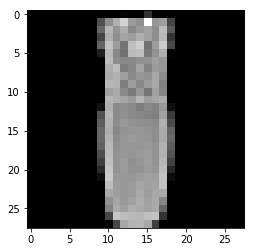

Image No. : 8096 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


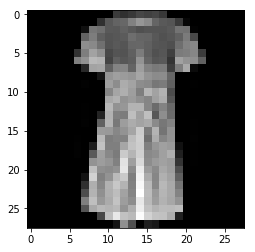

Image No. : 8097 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


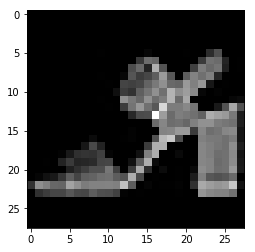

Image No. : 8098 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


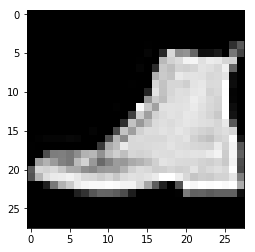

Image No. : 8099 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


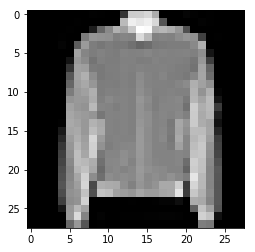

Image No. : 8100 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


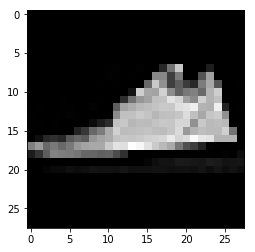

Image No. : 8101 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


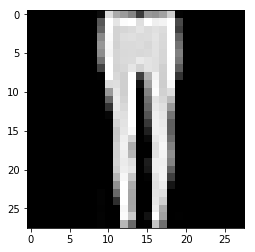

Image No. : 8102 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.
88 prediction out of 100


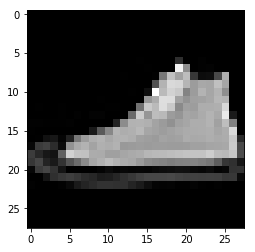

Image No. : 1430 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


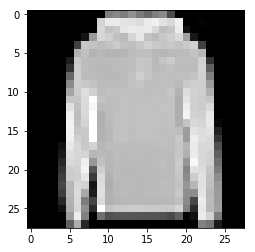

Image No. : 1431 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


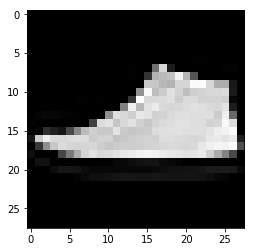

Image No. : 1432 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


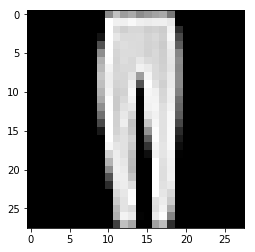

Image No. : 1433 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


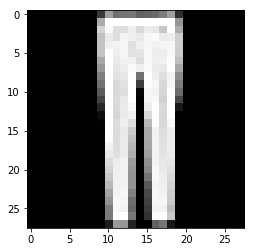

Image No. : 1434 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


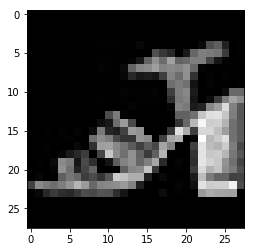

Image No. : 1435 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


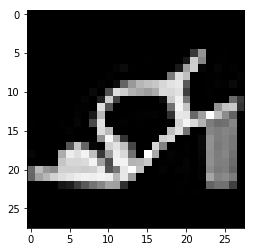

Image No. : 1436 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


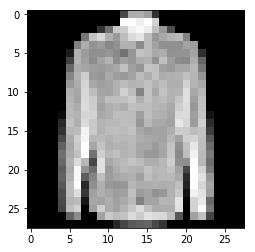

Image No. : 1437 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


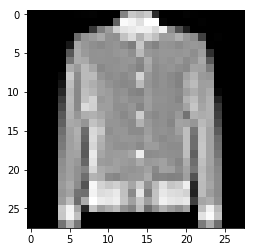

Image No. : 1438 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


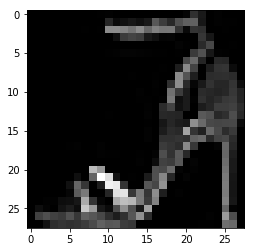

Image No. : 1439 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


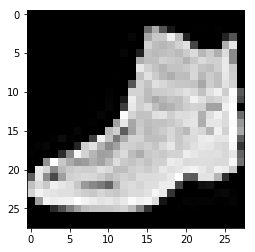

Image No. : 1440 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


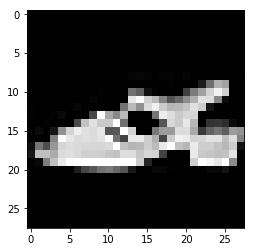

Image No. : 1441 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


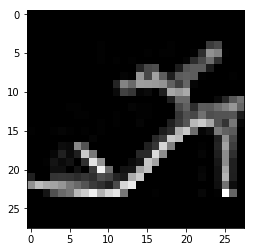

Image No. : 1442 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


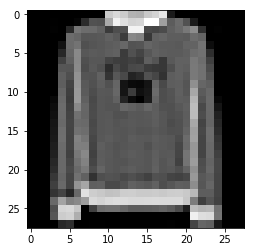

Image No. : 1443 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


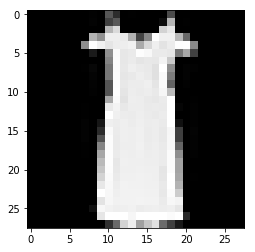

Image No. : 1444 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


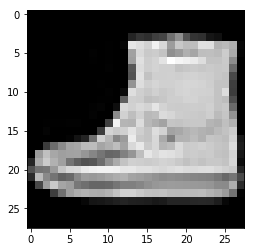

Image No. : 1445 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


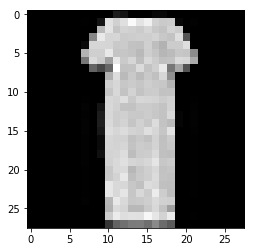

Image No. : 1446 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


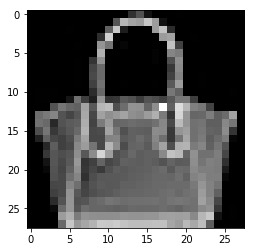

Image No. : 1447 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


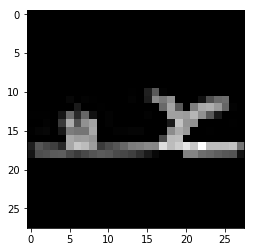

Image No. : 1448 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


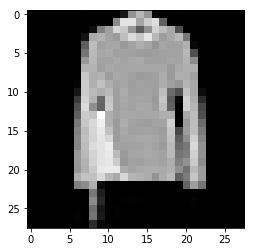

Image No. : 1449 , Predicted Label by Model :4, Actual Label: 2, Status: Opps! Wrong Prediction.


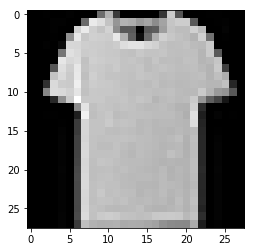

Image No. : 1450 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


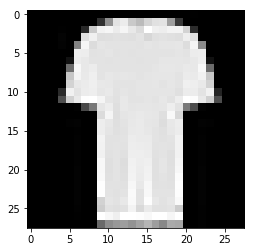

Image No. : 1451 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


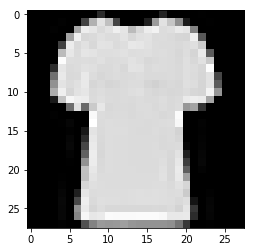

Image No. : 1452 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


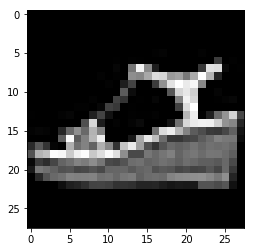

Image No. : 1453 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


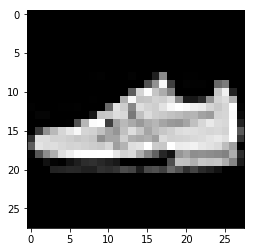

Image No. : 1454 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


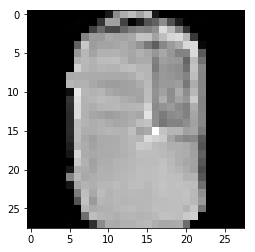

Image No. : 1455 , Predicted Label by Model :3, Actual Label: 8, Status: Opps! Wrong Prediction.


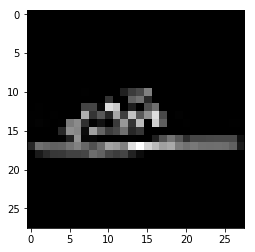

Image No. : 1456 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


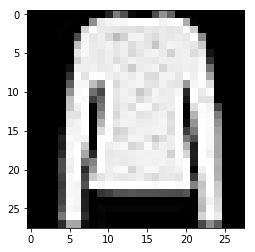

Image No. : 1457 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


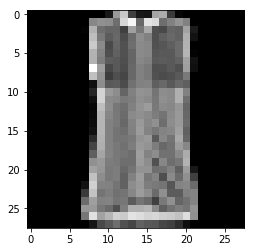

Image No. : 1458 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


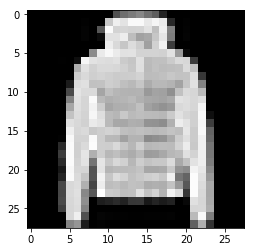

Image No. : 1459 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


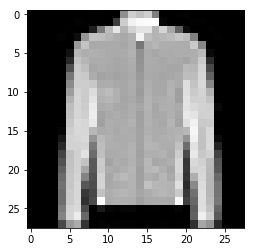

Image No. : 1460 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


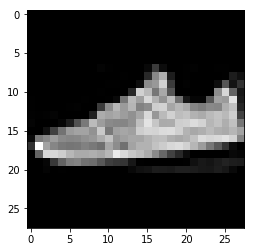

Image No. : 1461 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


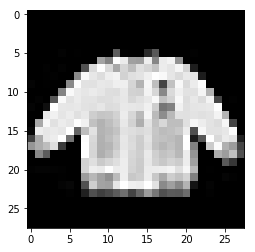

Image No. : 1462 , Predicted Label by Model :7, Actual Label: 4, Status: Opps! Wrong Prediction.


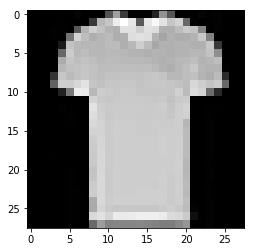

Image No. : 1463 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


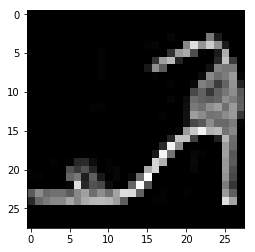

Image No. : 1464 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


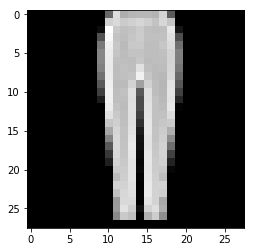

Image No. : 1465 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


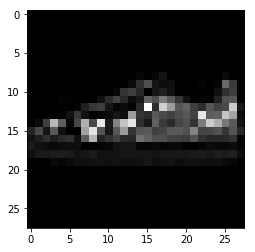

Image No. : 1466 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


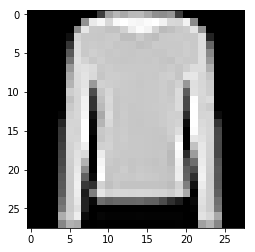

Image No. : 1467 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


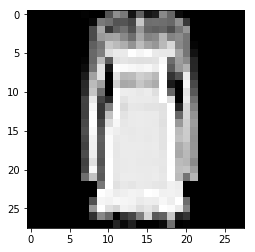

Image No. : 1468 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


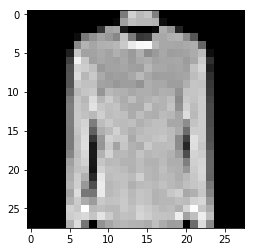

Image No. : 1469 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


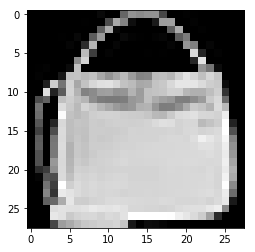

Image No. : 1470 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


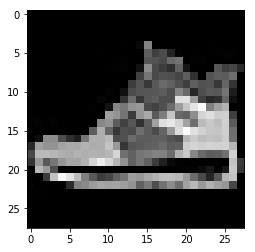

Image No. : 1471 , Predicted Label by Model :7, Actual Label: 9, Status: Opps! Wrong Prediction.


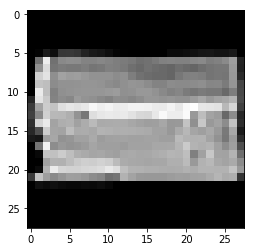

Image No. : 1472 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


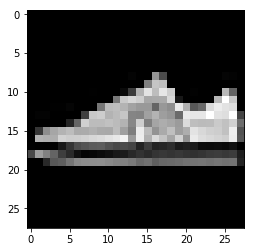

Image No. : 1473 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


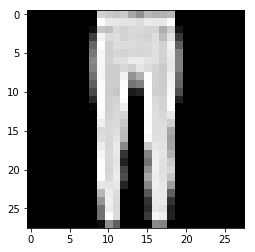

Image No. : 1474 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


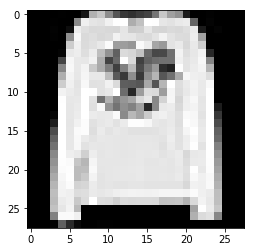

Image No. : 1475 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


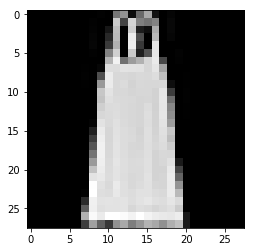

Image No. : 1476 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


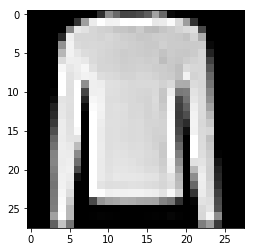

Image No. : 1477 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


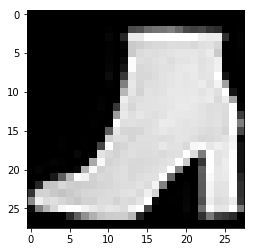

Image No. : 1478 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


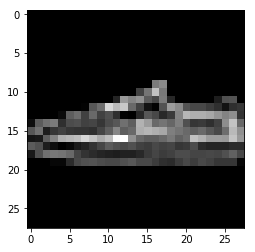

Image No. : 1479 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


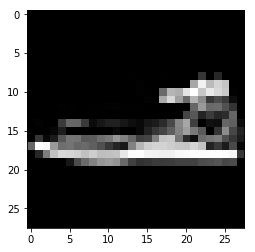

Image No. : 1480 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


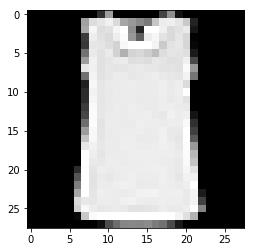

Image No. : 1481 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


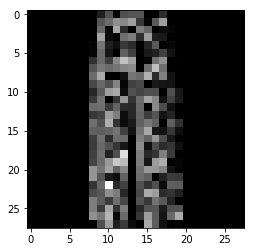

Image No. : 1482 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


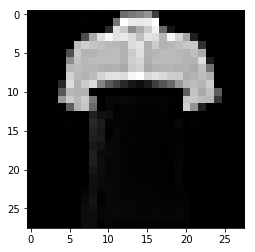

Image No. : 1483 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


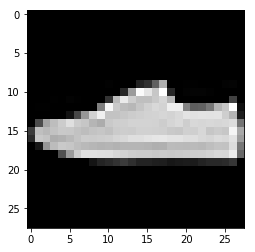

Image No. : 1484 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


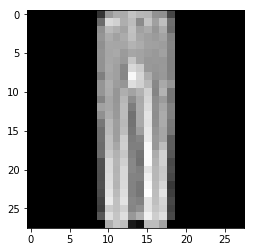

Image No. : 1485 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


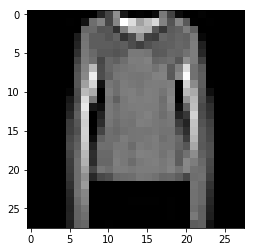

Image No. : 1486 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


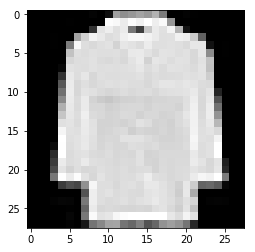

Image No. : 1487 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


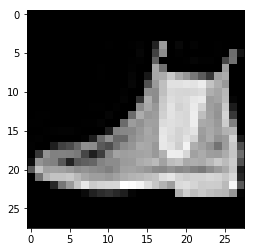

Image No. : 1488 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


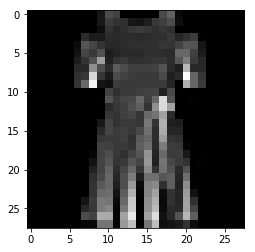

Image No. : 1489 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


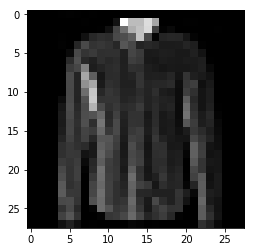

Image No. : 1490 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


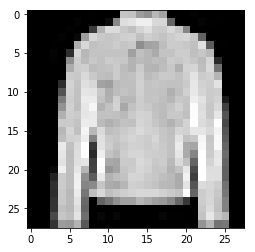

Image No. : 1491 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


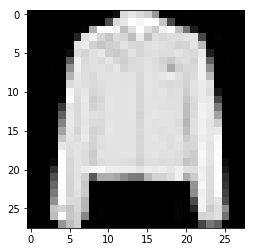

Image No. : 1492 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


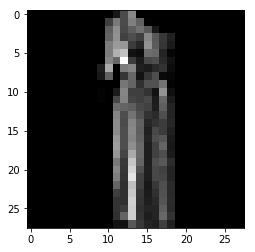

Image No. : 1493 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


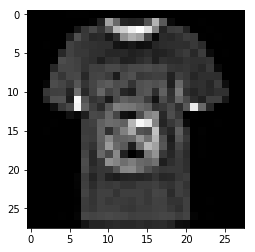

Image No. : 1494 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


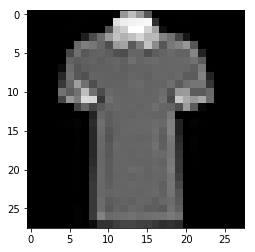

Image No. : 1495 , Predicted Label by Model :6, Actual Label: 0, Status: Opps! Wrong Prediction.


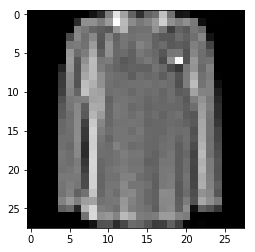

Image No. : 1496 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


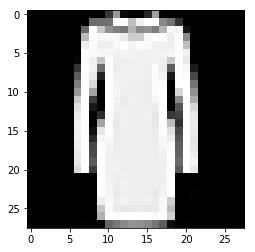

Image No. : 1497 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


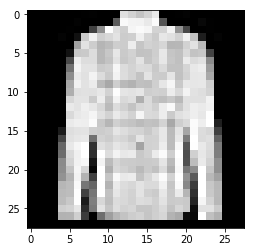

Image No. : 1498 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


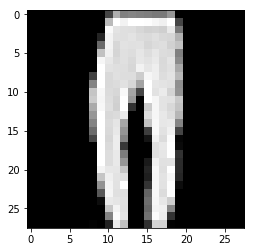

Image No. : 1499 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


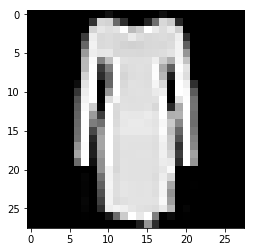

Image No. : 1500 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


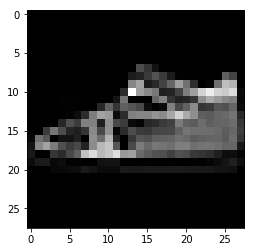

Image No. : 1501 , Predicted Label by Model :7, Actual Label: 5, Status: Opps! Wrong Prediction.


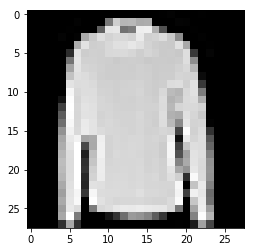

Image No. : 1502 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


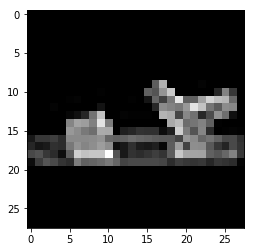

Image No. : 1503 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


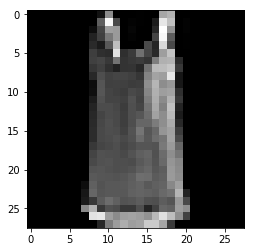

Image No. : 1504 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


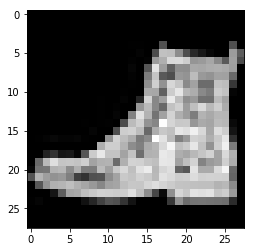

Image No. : 1505 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


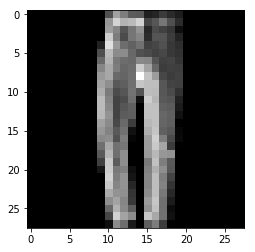

Image No. : 1506 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


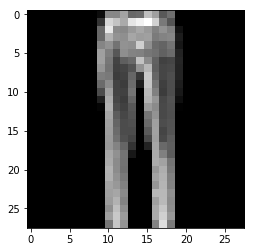

Image No. : 1507 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


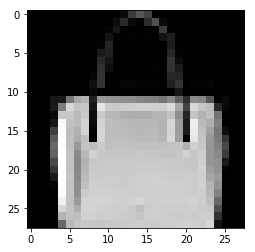

Image No. : 1508 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


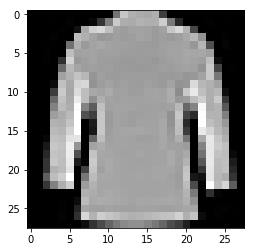

Image No. : 1509 , Predicted Label by Model :6, Actual Label: 2, Status: Opps! Wrong Prediction.


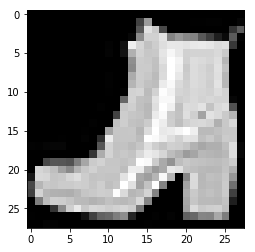

Image No. : 1510 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


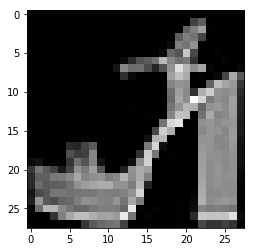

Image No. : 1511 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


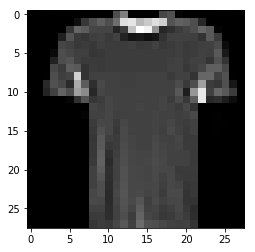

Image No. : 1512 , Predicted Label by Model :0, Actual Label: 0, Status: Congratulations! Predicted Correctly.


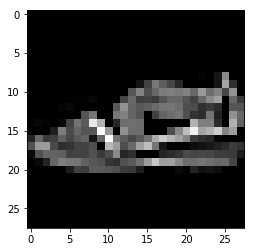

Image No. : 1513 , Predicted Label by Model :7, Actual Label: 5, Status: Opps! Wrong Prediction.


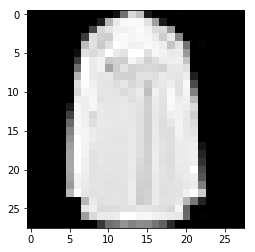

Image No. : 1514 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


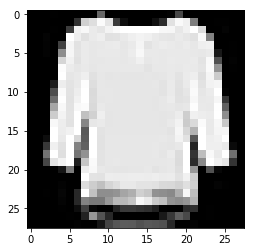

Image No. : 1515 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


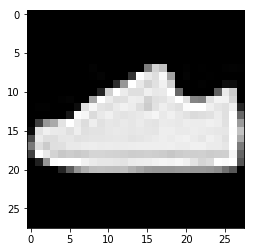

Image No. : 1516 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


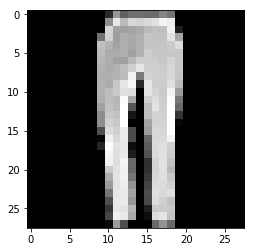

Image No. : 1517 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


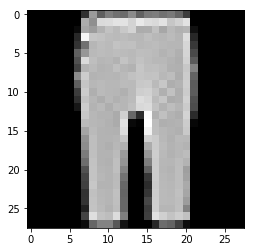

Image No. : 1518 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


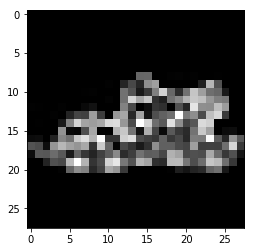

Image No. : 1519 , Predicted Label by Model :5, Actual Label: 5, Status: Congratulations! Predicted Correctly.


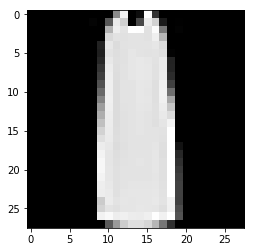

Image No. : 1520 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


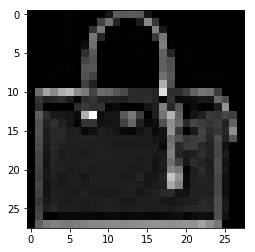

Image No. : 1521 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


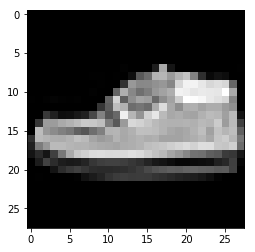

Image No. : 1522 , Predicted Label by Model :7, Actual Label: 9, Status: Opps! Wrong Prediction.


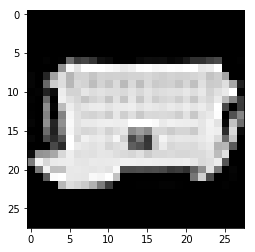

Image No. : 1523 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


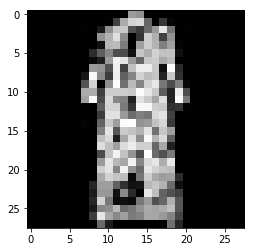

Image No. : 1524 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


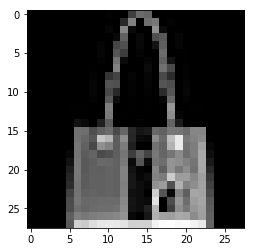

Image No. : 1525 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


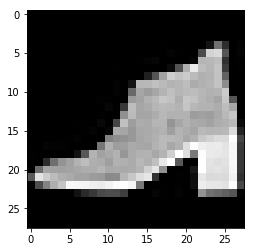

Image No. : 1526 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.


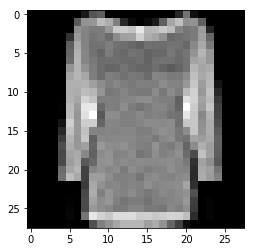

Image No. : 1527 , Predicted Label by Model :6, Actual Label: 2, Status: Opps! Wrong Prediction.


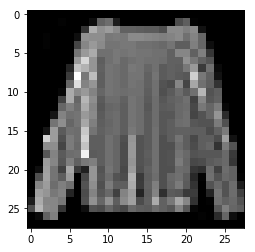

Image No. : 1528 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


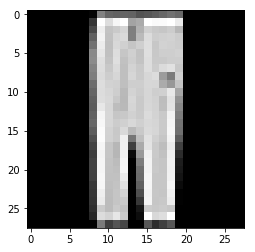

Image No. : 1529 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.
90 prediction out of 100


In [0]:
#random prediction and validation test on 10 images from test data selected randomly

def random_validation_test(test_dataset, test_labelset):
  start_chunk = np.random.randint(0, test_dataset.shape[0])
  end_chunk = start_chunk+100
  images = test_dataset[start_chunk:end_chunk]
  predicted = neural_net(test_dataset[start_chunk:end_chunk]) #model used for prediction
  counter = 0;
  correct = 0;
  for img in range(start_chunk,end_chunk):
    plt.imshow(tf.reshape(test_dataset[img],[28,28]), cmap='gray')
    plt.show()
    pred = np.argmax(predicted.numpy()[counter])
    act_label = test_labelset[img]
    
    if pred == act_label:
      status = "Congratulations! Predicted Correctly."
      correct +=1
    else:
      status = "Opps! Wrong Prediction."
    print(f"Image No. : {img} , Predicted Label by Model :{pred}, Actual Label: {act_label}, Status: {status}")
    
    counter = counter+1;
  print(f"{correct} prediction out of {100}")  
  
random_validation_test(x_test, y_test)